In [1]:
#dejo en una imagen solo los dados ----> recibo esto
#hago devuelta lo mismo para clasificar la forma
#hago componentes conectados
#find contours para contorno del cuadrado + cant de puntos
#puntos= longitud del contorno - 1


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

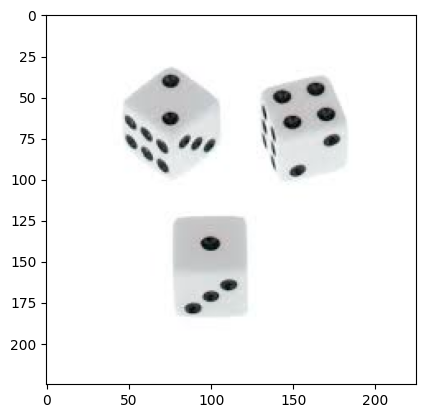

(<Figure size 640x480 with 1 Axes>,
 None)

In [3]:
image = cv2.imread("dados.jpg", cv2.IMREAD_COLOR)      # Cargo imagen
plt.figure(), plt.imshow(image), plt.show(block=False)

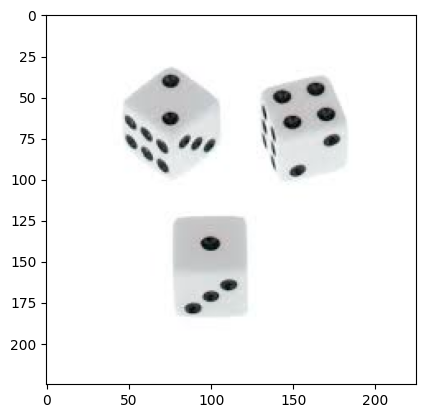

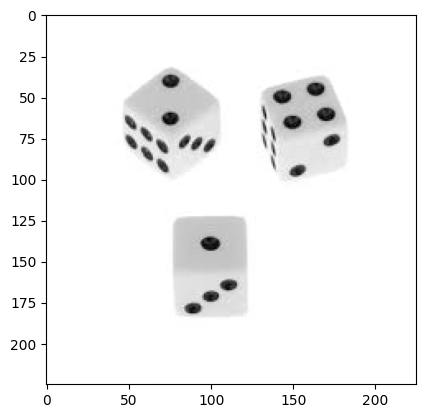

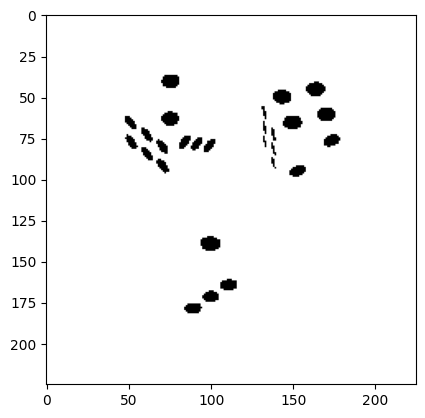

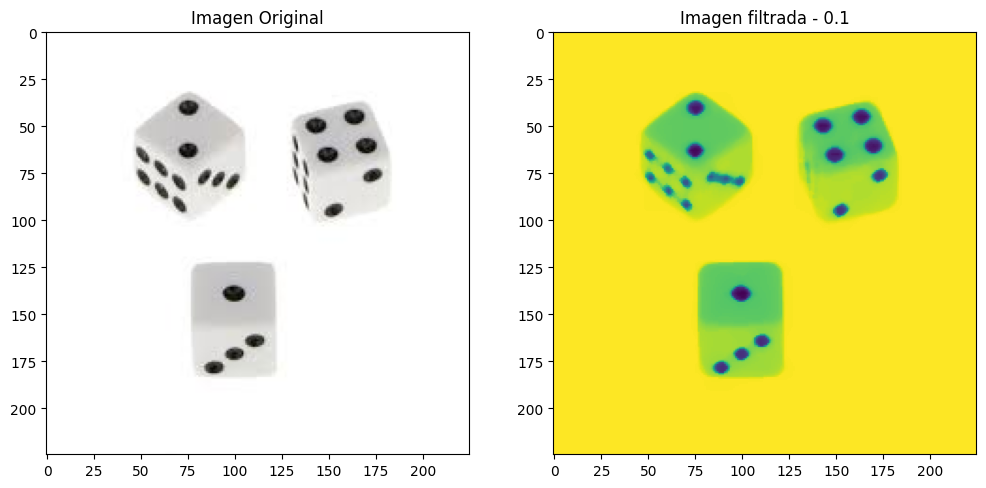

In [4]:
# Leer la imagen en color
img= cv2.imread("dados.jpg")
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W = img.shape[:2]
plt.imshow(img, cmap = 'gray'), plt.show(block = False)

#Imagen filtrada gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray"), plt.show(block = False)

# --- Binarizo ------------------------------------------------------------------------------------
th, binary_img = cv2.threshold(img_gray, 125, 1, cv2.THRESH_OTSU)
plt.figure(), plt.imshow(binary_img, cmap='gray'), plt.show(block=False)

kernel_size = 7  # Tamaño del kernel de mediana
img_filtered = cv2.medianBlur(img_gray, kernel_size)

# Muestra las imágenes originales y las filtradas
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_color)
plt.title('Imagen Original')
plt.subplot(122)
plt.imshow(img_filtered)
plt.title('Imagen filtrada - 0.1')
plt.show()

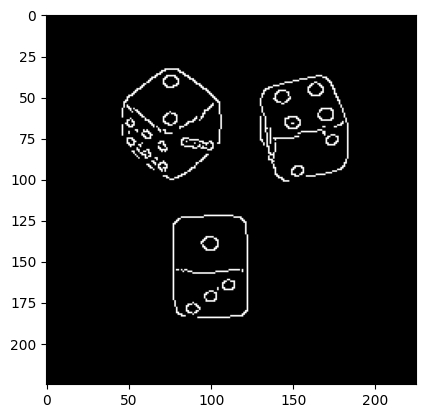

(<matplotlib.image.AxesImage at 0x164f0f9ed40>, None)

In [5]:
#Canny
img_canny_CV2 = cv2.Canny(img_filtered, 8, 50)#, apertureSize=3, L2gradient=True)
plt.imshow(img_canny_CV2, cmap="gray"), plt.show(block = False)

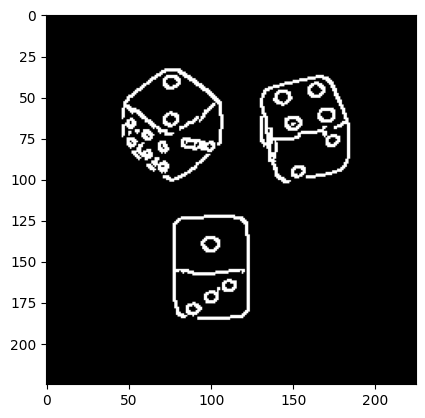

(<matplotlib.image.AxesImage at 0x164eeee0670>, None)

In [6]:
#Dilato
# kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
Fd = cv2.dilate(img_canny_CV2, kernel, iterations=1)
plt.imshow(Fd, cmap = "gray"), plt.show(block=False)

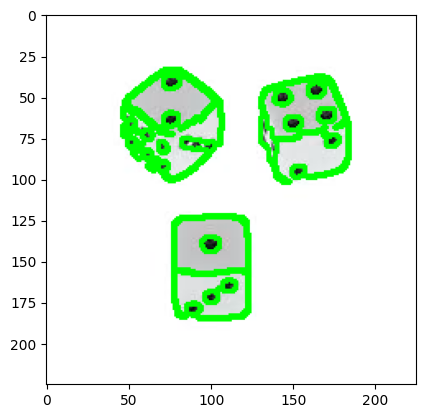

In [7]:
# Encontrar contornos en la imagen después de la operación de cierre
contours, _ = cv2.findContours(Fd, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen original
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # -1: dibujar todos los contornos encontrados

plt.imshow(img_contours)

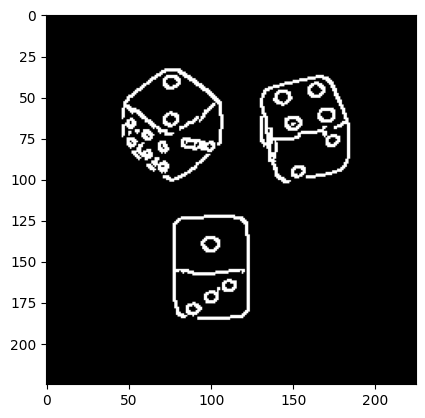

(<Figure size 640x480 with 1 Axes>,
 None)

In [8]:
# --- Operaciones morfológicas para mejorar la segmentación obtenida ------------------------------
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, se)   # Apertura para remover elementos pequeños
binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, se)  # Clausura para rellenar huecos.
plt.figure(), plt.imshow(Fd, cmap='gray'), plt.show(block=False)

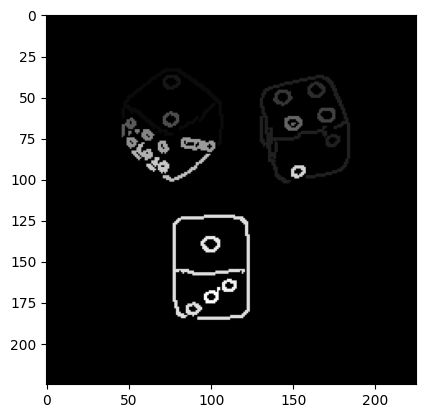

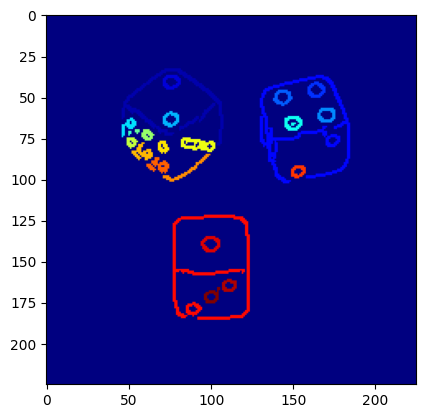

(<Figure size 640x480 with 1 Axes>,
 None)

In [9]:

# --- Componentes conectadas ------------------------------------------------------------
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(Fd)
plt.figure(), plt.imshow(labels, cmap='gray'), plt.show(block=False)                # Visualizo los objetos con sus labels en ESCALA DE GRISES

labels_color = np.uint8(255/(num_labels-1)*labels)                  # Llevo el rango de valores a [0 255] para diferenciar mejor los colores
# np.unique(labels_color)                                           # Por si quieren verificar los valores asignados....
im_color = cv2.applyColorMap(labels_color, cv2.COLORMAP_JET)
im_color = cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB)                # El mapa de color que se aplica está en BGR --> convierto a RGB
plt.figure(), plt.imshow(im_color), plt.show(block=False)

In [10]:
#esto si
import numpy as np

# Suponiendo que ya tienes el área y el perímetro del cuadrado
area_cuadrado = 4794.0
perimetro_cuadrado = 270.28427052497864

# Calcula el factor de forma para un cuadrado
factor_forma_cuadrado = area_cuadrado / (perimetro_cuadrado**2)

# Imprime el resultado
print(f"Factor de forma para el cuadrado: {factor_forma_cuadrado}")

Factor de forma para el cuadrado: 0.06562306115108682


In [11]:
#ESTO SI 
# --- Defino parametros para la clasificación -------------------------------------------
RHO_TH = 0.8   # Factor de forma (rho)   #menor a 0.8 es un cuadrado
perimetro_cuadrado = 270.28427052497864
AREA_TH = 500  # Umbral de area
aux = np.zeros_like(labels)
labeled_image = cv2.merge([aux, aux, aux])

Objeto  --> Dado /  Huecos: 0
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 6
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 0
Objeto  --> Dado /  Huecos: 0
Objeto  --> Dado /  Huecos: 2
Objeto  --> Dado /  Huecos: 2
Objeto  --> Dado /  Huecos: 4
Objeto  --> Dado /  Huecos: 2
Objeto  --> Dado /  Huecos: 4
Objeto  --> Dado /  Huecos: 0
Objeto  --> Dado /  Huecos: 3
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1
Objeto  --> Dado /  Huecos: 1


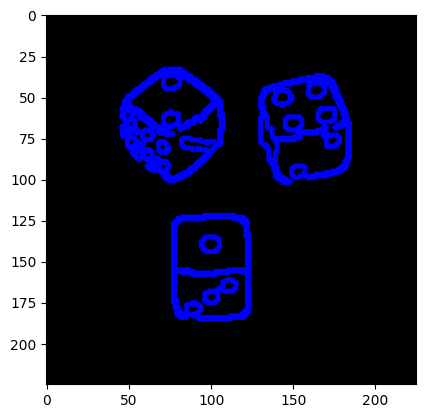

(<Figure size 640x480 with 1 Axes>,
 None)

In [12]:
#ESTO SI
labeled_shapes = np.zeros_like(image)
# Clasifico en base al factor de forma
for i in range(1, num_labels):

    

    # --- Selecciono el objeto actual -----------------------------------------
    obj = (labels == i).astype(np.uint8)

    # --- Calculo Rho ---------------------------------------------------------
    ext_contours, _ = cv2.findContours(obj, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(ext_contours[0])
    perimeter = cv2.arcLength(ext_contours[0], True)
    rho = area/(perimeter**2)
    flag_cuadrado = rho < RHO_TH
    #print(f"{rho}")
    # --- Calculo cantidad de huecos ------------------------------------------
    all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    holes = len(all_contours) - 1

    # --- Muestro por pantalla el resultado -----------------------------------
    #print(f"Objeto  --> Dado /  Huecos: {holes}")

    if flag_cuadrado:
        # Dibujar el contorno del dado en la imagen de salida
        cv2.drawContours(labeled_shapes, [ext_contours[0]], -1, (0, 0, 255), 2)
        all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        holes = len(all_contours) - 1
        print(f"Objeto  --> Dado /  Huecos: {holes}")
    else:
        print(f" no es un dado")

plt.figure(), plt.imshow(labeled_shapes), plt.show(block=False)

In [13]:
#ver como encontrar los puntos
# Luego de haber clasificado los dados y de sacar los bordes en la imagen, se debe contar cuantos puntos tiene el dado. 
# En el ejercicio, se espera que hallemos los puntos de la cara superior, asi detectamos el valor del dado
# Para esto, lo que se hace es, luego de hallar los bordes adecuadamente, se tratan de identificar los circulos
# perfectos, ya que se espera que estos correspondan a la cara superior. Cualquier otro punto al estar en una cara externa
# no tendra forma de circulo, sera una elipse, por lo que no se encontrara con el metodo del area 


Objeto  --> Dado /  Huecos: 0
1 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 6
7 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 0
1 contornos
Objeto  --> Dado /  Huecos: 0
1 contornos
Objeto  --> Dado /  Huecos: 2
3 contornos
Objeto  --> Dado /  Huecos: 2
3 contornos
Objeto  --> Dado /  Huecos: 4
5 contornos
Objeto  --> Dado /  Huecos: 2
3 contornos
Objeto  --> Dado /  Huecos: 4
5 contornos
Objeto  --> Dado /  Huecos: 0
1 contornos
Objeto  --> Dado /  Huecos: 3
4 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos
Objeto  --> Dado /  Huecos: 1
2 contornos


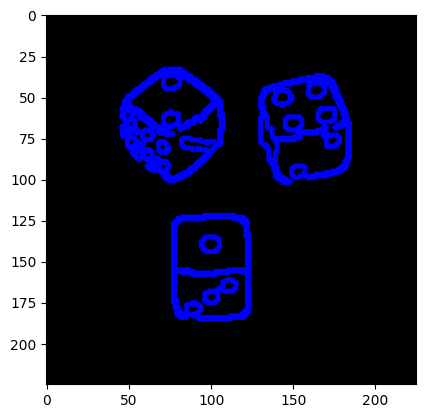

In [14]:
labeled_shapes = np.zeros_like(im_color)
#probando
# Clasifico en base al factor de forma
for i in range(1, num_labels):

    

    # --- Selecciono el objeto actual -----------------------------------------
    obj = (labels == i).astype(np.uint8)

    # --- Calculo Rho ---------------------------------------------------------
    ext_contours, _ = cv2.findContours(obj, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(ext_contours[0])
    perimeter = cv2.arcLength(ext_contours[0], True)
    rho = area/(perimeter**2)
    flag_cuadrado = rho < RHO_TH
    #print(f"{rho}")
    # --- Calculo cantidad de huecos ------------------------------------------
    all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    holes = len(all_contours) - 1

    # --- Muestro por pantalla el resultado -----------------------------------
    #print(f"Objeto  --> Dado /  Huecos: {holes}")

    

    if flag_cuadrado:
        
        # Dibujar el contorno del dado en la imagen de salida
        cv2.drawContours(labeled_shapes, [ext_contours[0]], -1, (0, 0, 255), 2)
        all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        holes = len(all_contours) - 1
        
        print(f"Objeto  --> Dado /  Huecos: {holes}")
        print(f"{len(all_contours)} contornos")
    else:
        print("no es un dado")
        # Dibujar el contorno de otro objeto en la imagen de salida
        cv2.drawContours(labeled_shapes, [ext_contours[0]], -1, (255, 0, 0), 2)

# Mostrar la imagen de salida
plt.figure()
plt.imshow(labeled_shapes)
plt.show()

In [15]:
# --- Defino parametros para la clasificación -------------------------------------------
RHO_TH = 0.8    # Factor de forma (rho)
AREA_TH = 500   # Umbral de area
aux = np.zeros_like(labels)
labeled_image = cv2.merge([aux, aux, aux])

Objeto  1 --> Circular: False  /  Huecos: 0
Objeto  2 --> Circular: True  /  Huecos: 1
Objeto  3 --> Circular: False  /  Huecos: 6
Objeto  4 --> Circular: True  /  Huecos: 1
Objeto  5 --> Circular: True  /  Huecos: 1
Objeto  6 --> Circular: True  /  Huecos: 1
Objeto  7 --> Circular: True  /  Huecos: 1
Objeto  8 --> Circular: False  /  Huecos: 1
Objeto  9 --> Circular: True  /  Huecos: 1
Objeto 10 --> Circular: False  /  Huecos: 0
Objeto 11 --> Circular: True  /  Huecos: 0
Objeto 12 --> Circular: True  /  Huecos: 2
Objeto 13 --> Circular: True  /  Huecos: 2
Objeto 14 --> Circular: False  /  Huecos: 4
Objeto 15 --> Circular: False  /  Huecos: 2
Objeto 16 --> Circular: False  /  Huecos: 4
Objeto 17 --> Circular: False  /  Huecos: 0
Objeto 18 --> Circular: False  /  Huecos: 3
Objeto 19 --> Circular: True  /  Huecos: 1
Objeto 20 --> Circular: False  /  Huecos: 1
Objeto 21 --> Circular: True  /  Huecos: 1
Objeto 22 --> Circular: True  /  Huecos: 1
Objeto 23 --> Circular: False  /  Huecos: 1


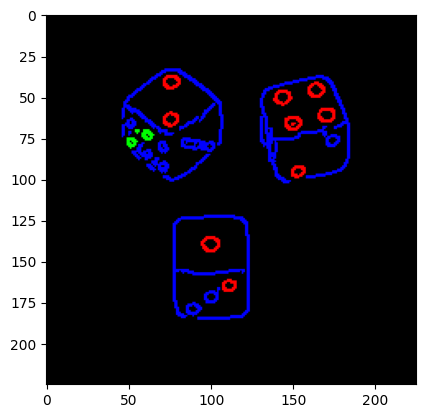

In [16]:
#probando



# --- Clasificación ---------------------------------------------------------------------
# Clasifico en base al factor de forma
for i in range(1, num_labels):

    

   

    # --- Selecciono el objeto actual -----------------------------------------
    obj = (labels == i).astype(np.uint8)

    # --- Calculo Rho ---------------------------------------------------------
    ext_contours, _ = cv2.findContours(obj, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(ext_contours[0])
    perimeter = cv2.arcLength(ext_contours[0], True)
    rho = 4 * np.pi * area/(perimeter**2)
    flag_circular = rho > RHO_TH

    # --- Calculo cantidad de huecos ------------------------------------------
    all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    holes = len(all_contours) - 1

    # --- Muestro por pantalla el resultado -----------------------------------
    print(f"Objeto {i:2d} --> Circular: {flag_circular}  /  Huecos: {holes}")

    # --- Clasifico -----------------------------------------------------------
    #if not circular?
    if flag_circular:
        if holes == 1:
            labeled_image[obj == 1, 0] = 255    # Circular con 1 hueco
        else:
            labeled_image[obj == 1, 1] = 255    # Circular con mas de 1 hueco
    else:
        labeled_image[obj == 1, 2] = 255        # No circular

plt.figure(); plt.imshow(labeled_image); plt.show(block=False)

#MEJOR CODIGO 

In [19]:
# --- Defino parametros para la clasificación -------------------------------------------
RHO_TH = 0.8    # Factor de forma (rho)
AREA_TH = 500   # Umbral de area
aux = np.zeros_like(labels)
labeled_image = cv2.merge([aux, aux, aux])

 Es un dado y tiene 6 puntos
 Es un dado y tiene 1 puntos


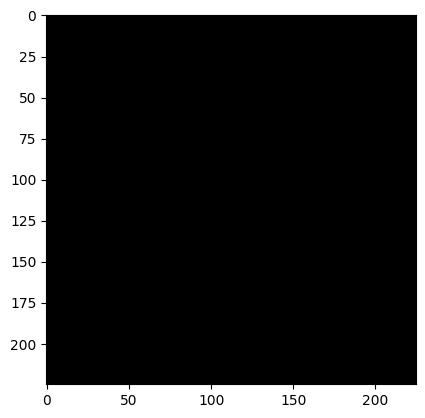

In [20]:
# Clasifico en base al factor de forma
for i in range(1, num_labels):

    # --- Remuevo celulas con area chica --------------------------------------
    if (stats[i, cv2.CC_STAT_AREA] < AREA_TH):
        continue

    # --- Selecciono el objeto actual -----------------------------------------
    obj = (labels == i).astype(np.uint8)

    all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    holes = len(all_contours) - 1

    # --- Calculo Rho ---------------------------------------------------------
    ext_contours, _ = cv2.findContours(obj, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(ext_contours[0])
    perimeter = cv2.arcLength(ext_contours[0], True)
    rho = 4 * np.pi * area/(perimeter**2)
    flag_circular = rho > RHO_TH
    if flag_circular:
        print("es una moneda")
    else:
        # --- Calculo cantidad de huecos ------------------------------------------
        all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        holes = len(all_contours) - 1
        print(f" Es un dado y tiene {holes} puntos")
plt.figure(); plt.imshow(labeled_image); plt.show(block=False)